In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter('ignore')

In [288]:
def metric(ytest,ypred):
    return log_loss(ytest,ypred)

In [289]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Machinehack-Financial-Risk-Prediction\Train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Machinehack-Financial-Risk-Prediction\Test.csv')
sample = pd.read_excel(r'C:\Users\Rahul\Desktop\Machinehack-Financial-Risk-Prediction\Sample_Submission.xlsx')

In [290]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [291]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [292]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [293]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
City                    543 non-null int64
Location_Score          543 non-null float64
Internal_Audit_Score    543 non-null int64
External_Audit_Score    543 non-null int64
Fin_Score               543 non-null int64
Loss_score              543 non-null int64
Past_Results            543 non-null int64
IsUnderRisk             543 non-null int64
dtypes: float64(1), int64(7)
memory usage: 34.0 KB


In [294]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
City                    233 non-null int64
Location_Score          233 non-null float64
Internal_Audit_Score    233 non-null int64
External_Audit_Score    233 non-null int64
Fin_Score               233 non-null int64
Loss_score              233 non-null int64
Past_Results            233 non-null int64
dtypes: float64(1), int64(6)
memory usage: 12.8 KB


In [295]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [296]:
test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

In [297]:
target='IsUnderRisk'

In [298]:
# No. of elements which are in test but not in train
for col in train.columns.tolist():
    if col != target:
        print("{}----->\t{}".format(col,len(set(test[col].unique())-set(train[col].unique()))))

City----->	2
Location_Score----->	228
Internal_Audit_Score----->	0
External_Audit_Score----->	0
Fin_Score----->	0
Loss_score----->	0
Past_Results----->	1


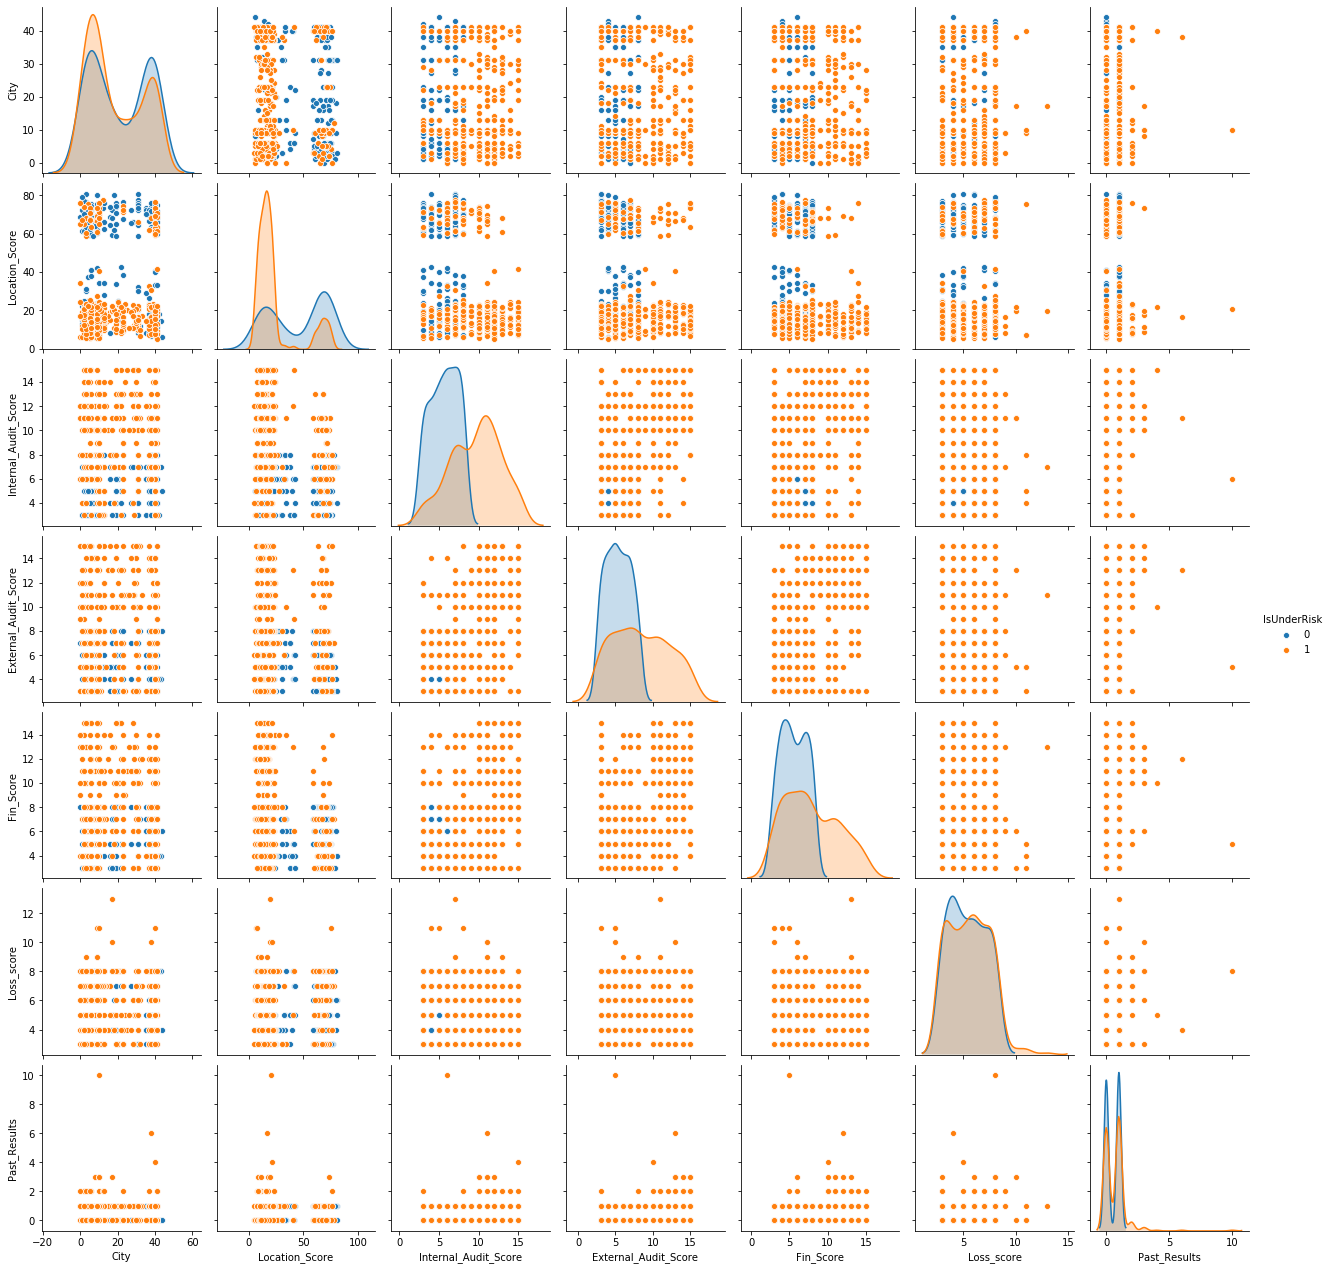

In [299]:
sns.pairplot(train, hue = 'IsUnderRisk')

In [300]:
train['IsUnderRisk'].value_counts()

1    340
0    203
Name: IsUnderRisk, dtype: int64

In [301]:
label=train.IsUnderRisk

In [302]:
train = train.sort_index(by = 'City').reset_index(drop=True)

In [303]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,0,6.265,6,3,13,4,0,1
1,0,64.929,6,5,4,8,0,1
2,0,68.706,6,7,8,8,1,0
3,0,76.010,8,15,14,7,2,1
4,0,17.261,12,12,9,6,1,1


In [304]:
train.loc[438,'Past_Results'] = 1
train.loc[213,'Past_Results'] = 1

In [305]:
smote = SMOTE(ratio='minority')
train1,label1=smote.fit_sample(train,label)

In [306]:
train = pd.DataFrame(train1,columns=train.columns)
label = pd.DataFrame(label1)
label.rename({0:'IsUnderRisk'},axis=1,inplace=True)

In [307]:
train_dummies = pd.get_dummies(pd.DataFrame(train[['Past_Results']].astype('category')))

In [308]:
test_dummies = pd.get_dummies(pd.DataFrame(test[['Past_Results']].astype('category')))

In [309]:
train=pd.concat([train,train_dummies],axis = 1)
test=pd.concat([test,test_dummies],axis = 1)

In [310]:
train.shape

(680, 88)

In [311]:
mm = MinMaxScaler()
train[['Location_Score']]=pd.DataFrame(mm.fit_transform(train[['Location_Score']]))
test[['Location_Score']]=pd.DataFrame(mm.fit_transform(test[['Location_Score']]))

In [312]:
train.shape

(680, 88)

In [313]:
train.drop(columns=['City','Past_Results'],inplace=True)
test.drop(columns=['City','Past_Results'],inplace=True)

In [314]:
train.head()

,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,IsUnderRisk,Past_Results_0.0,Past_Results_0.013718938064775088,Past_Results_0.03437247201827798,Past_Results_0.0365899624256486,...,Past_Results_1.0,Past_Results_1.0863849623834163,Past_Results_1.2158024178179765,Past_Results_1.3450641111764416,Past_Results_1.4152210299696475,Past_Results_1.8617738978387113,Past_Results_1.9188892594729556,Past_Results_2.0,Past_Results_3.0,Past_Results_4.0
0,0.014281,6.0,3.0,13.0,4.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.790014,6.0,5.0,4.0,8.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.839958,6.0,7.0,8.0,8.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.936541,8.0,15.0,14.0,7.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.159685,12.0,12.0,9.0,6.0,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [315]:
label.shape

(680, 1)

In [316]:
model = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), BaggingClassifier()]
predicted = []
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=777611)
skf.get_n_splits(train.drop(columns=['IsUnderRisk']),label)
for i in model:
    mod = i
    a = list()
    b = list()
    for train_index,test_index in skf.split(train.drop(columns=['IsUnderRisk']),label):
        x1_train,x1_test = train.drop(columns=['IsUnderRisk']).iloc[train_index],train.drop(columns=['IsUnderRisk']).iloc[test_index]
        y1_train,y1_test = label.iloc[train_index],label.iloc[test_index]
        
        mod.fit(x1_train,y1_train)
        pred_train = mod.predict_proba(x1_train)
        pred_test = mod.predict_proba(x1_test)
        a.append(metric(pd.get_dummies(y1_train),pred_train))
        b.append(metric(pd.get_dummies(y1_test), pred_test))
        
    print(str(mod).split('(')[0],'  Training Loss : ',np.mean(a),'     Testing Loss : ',np.mean(b), '\n')
    
   # if str(mod)==str(AdaBoostClassifier()):
       # predicted.append(mod.predict_proba(test))

LogisticRegression   Training Loss :  0.614835487064295      Testing Loss :  0.6307867842462632 

DecisionTreeClassifier   Training Loss :  9.992007221626415e-16      Testing Loss :  13.360405524405653 

RandomForestClassifier   Training Loss :  0.17633578205168557      Testing Loss :  0.6248449274073007 

AdaBoostClassifier   Training Loss :  0.6814330456160297      Testing Loss :  0.686934932159297 

ExtraTreesClassifier   Training Loss :  9.992007221626415e-16      Testing Loss :  0.621664993294125 

GradientBoostingClassifier   Training Loss :  0.41533056160043763      Testing Loss :  0.6407066069724385 

BaggingClassifier   Training Loss :  0.18589011294430846      Testing Loss :  0.987079648487524 



In [219]:
def splitting(m, train= train, label = label, test = test, random_state = 400, split = 5):
    a = list()
    b = list()
    sss=StratifiedShuffleSplit(random_state= random_state, test_size=0.2,  n_splits=split)
    pred_tr = pd.DataFrame(np.zeros(shape = (train.shape[0],1)))
    pred_te = pd.DataFrame(np.zeros(shape = (test.shape[0], split)))

    for i, (tr_index, te_index) in enumerate(sss.split(train,label)):
        xtrain, xtest = train.loc[tr_index,:], train.loc[te_index,:]
        ytrain, ytest = label[tr_index], label[te_index]   
        m.fit(xtrain,ytrain)
        p = m.predict_proba(xtest)
       # pred_tr.loc[te_index,0] = p
       # pred_te.iloc[:,i] = m.predict_proba(test)
        
        print(f"  Testing : {metric(ytest,p)}")        
    #    a.append(metric(ytrain,p))
        b.append(metric(ytest,p))
    print(f'\nTraining Mean: {np.mean(a)} \nTesting Mean: {np.mean(b)}')
    if m.feature_importances_ is not None:
        print(pd.Series(m.feature_importances_, index = train.columns).sort_values(ascending=True).plot.barh())

In [220]:
splitting(AdaBoostClassifier(),train,label,test,random_state=34624)

KeyError: "None of [Int64Index([301, 598, 346, 573, 174, 561, 320, 362, 512, 112,\n            ...\n            289,  17, 519, 528, 205,  59, 674, 649, 384, 114],\n           dtype='int64', length=544)] are in the [columns]"